Start by copying this into your Google Drive!!

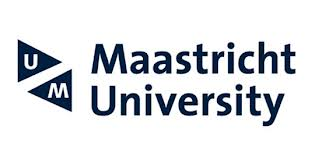
#Faculty of Science and Engineering - Department of Advanced Computer Sciences
# Course Advanced Natural Language Processing (ANLP) - Tutorial Dialogue

By Jan Scholtes

Welcome to the tutorial on NLP and Dialogue or Q&A models. In this notebook you will get introduced to different models used to manage a human-computer dialogue.

For this notebook we would need our GPU again. You can activate your GPU by clicking on Runtime, then Change runtime type and pressing GPU. If you hit the Google's GPU limits for usage, you can use other free GPU services such as Kaggle GPU's (recommended), Amazon's GPU's or Paperspace Gradient or of course your local GPU on your computer (if you have one).


A **chatbot** or **chatterbot** is a software application used to conduct an on-line chat conversation via text or text-to-speech, in lieu of providing direct contact with a live human agent. Designed to convincingly simulate the way a human would behave as a conversational partner, chatbot systems typically require continuous tuning and testing, and many in production remain unable to adequately converse, while none of them can pass the standard Turing test. The term "ChatterBot" was originally coined by Michael Mauldin (creator of the first Verbot) in 1994 to describe these conversational programs.

Chatbots are used in dialog systems for various purposes including customer service, request routing, or information gathering. While some chatbot applications use extensive word-classification processes, natural-language processors, and sophisticated AI, others simply scan for general keywords and generate responses using common phrases obtained from an associated library or database.

Most chatbots are accessed on-line via website popups or through virtual assistants. They can be classified into usage categories that include: commerce (e-commerce via chat), education, entertainment, finance, health, news, and productivity.

# ELIZA and PARRY

Among the most notable early chatbots are ELIZA (1966) and PARRY (1972). Joseph Weizenbaum's program ELIZA, published in 1966, which seemed to be able to fool users into believing that they were conversing with a real human. However Weizenbaum himself did not claim that ELIZA was genuinely intelligent. PARRY was the first model to pass (for some users) the Turing test, but that could also have to do with the fact that it was designed to simulate a paranoide patient, allowing it to avoid in-depth topical discussions.

While ELIZA and PARRY were used exclusively to simulate typed conversation, many chatbots now include other functional features, such as games and web searching abilities.

ELIZA is part of the NTLK code (source code can be found here: https://www.nltk.org/_modules/nltk/chat/eliza.html). As you can see, it is a really simple program. So, let's try that first... (use 'quit' to end your therapy session)

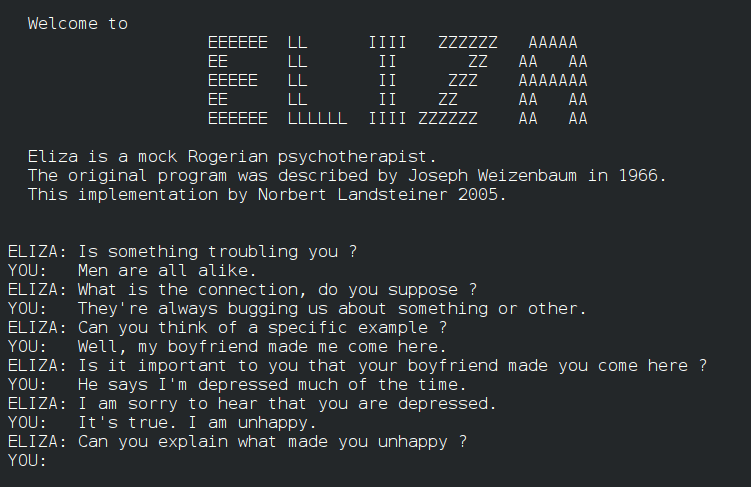


In [ ]:


# Natural Language Toolkit: Eliza
#
# Copyright (C) 2001-2022 NLTK Project
# Authors: Steven Bird <stevenbird1@gmail.com>
#          Edward Loper <edloper@gmail.com>
# URL: <https://www.nltk.org/>
# For license information, see LICENSE.TXT

# Based on an Eliza implementation by Joe Strout <joe@strout.net>,
# Jeff Epler <jepler@inetnebr.com> and Jez Higgins <mailto:jez@jezuk.co.uk>.

# a translation table used to convert things you say into things the
# computer says back, e.g. "I am" --> "you are"

import nltk
from nltk.chat.util import Chat, reflections

pairs = (
    (
        r"I need (.*)",
        (
            "Why do you need %1?",
            "Would it really help you to get %1?",
            "Are you sure you need %1?",
        ),
    ),
    (
        r"Why don\'t you (.*)",
        (
            "Do you really think I don't %1?",
            "Perhaps eventually I will %1.",
            "Do you really want me to %1?",
        ),
    ),
    (
        r"Why can\'t I (.*)",
        (
            "Do you think you should be able to %1?",
            "If you could %1, what would you do?",
            "I don't know -- why can't you %1?",
            "Have you really tried?",
        ),
    ),
    (
        r"I can\'t (.*)",
        (
            "How do you know you can't %1?",
            "Perhaps you could %1 if you tried.",
            "What would it take for you to %1?",
        ),
    ),
    (
        r"I am (.*)",
        (
            "Did you come to me because you are %1?",
            "How long have you been %1?",
            "How do you feel about being %1?",
        ),
    ),
    (
        r"I\'m (.*)",
        (
            "How does being %1 make you feel?",
            "Do you enjoy being %1?",
            "Why do you tell me you're %1?",
            "Why do you think you're %1?",
        ),
    ),
    (
        r"Are you (.*)",
        (
            "Why does it matter whether I am %1?",
            "Would you prefer it if I were not %1?",
            "Perhaps you believe I am %1.",
            "I may be %1 -- what do you think?",
        ),
    ),
    (
        r"What (.*)",
        (
            "Why do you ask?",
            "How would an answer to that help you?",
            "What do you think?",
        ),
    ),
    (
        r"How (.*)",
        (
            "How do you suppose?",
            "Perhaps you can answer your own question.",
            "What is it you're really asking?",
        ),
    ),
    (
        r"Because (.*)",
        (
            "Is that the real reason?",
            "What other reasons come to mind?",
            "Does that reason apply to anything else?",
            "If %1, what else must be true?",
        ),
    ),
    (
        r"(.*) sorry (.*)",
        (
            "There are many times when no apology is needed.",
            "What feelings do you have when you apologize?",
        ),
    ),
    (
        r"Hello(.*)",
        (
            "Hello... I'm glad you could drop by today.",
            "Hi there... how are you today?",
            "Hello, how are you feeling today?",
        ),
    ),
    (
        r"I think (.*)",
        ("Do you doubt %1?", "Do you really think so?", "But you're not sure %1?"),
    ),
    (
        r"(.*) friend (.*)",
        (
            "Tell me more about your friends.",
            "When you think of a friend, what comes to mind?",
            "Why don't you tell me about a childhood friend?",
        ),
    ),
    (r"Yes", ("You seem quite sure.", "OK, but can you elaborate a bit?")),
    (
        r"(.*) computer(.*)",
        (
            "Are you really talking about me?",
            "Does it seem strange to talk to a computer?",
            "How do computers make you feel?",
            "Do you feel threatened by computers?",
        ),
    ),
    (
        r"Is it (.*)",
        (
            "Do you think it is %1?",
            "Perhaps it's %1 -- what do you think?",
            "If it were %1, what would you do?",
            "It could well be that %1.",
        ),
    ),
    (
        r"It is (.*)",
        (
            "You seem very certain.",
            "If I told you that it probably isn't %1, what would you feel?",
        ),
    ),
    (
        r"Can you (.*)",
        (
            "What makes you think I can't %1?",
            "If I could %1, then what?",
            "Why do you ask if I can %1?",
        ),
    ),
    (
        r"Can I (.*)",
        (
            "Perhaps you don't want to %1.",
            "Do you want to be able to %1?",
            "If you could %1, would you?",
        ),
    ),
    (
        r"You are (.*)",
        (
            "Why do you think I am %1?",
            "Does it please you to think that I'm %1?",
            "Perhaps you would like me to be %1.",
            "Perhaps you're really talking about yourself?",
        ),
    ),
    (
        r"You\'re (.*)",
        (
            "Why do you say I am %1?",
            "Why do you think I am %1?",
            "Are we talking about you, or me?",
        ),
    ),
    (
        r"I don\'t (.*)",
        ("Don't you really %1?", "Why don't you %1?", "Do you want to %1?"),
    ),
    (
        r"I feel (.*)",
        (
            "Good, tell me more about these feelings.",
            "Do you often feel %1?",
            "When do you usually feel %1?",
            "When you feel %1, what do you do?",
        ),
    ),
    (
        r"I have (.*)",
        (
            "Why do you tell me that you've %1?",
            "Have you really %1?",
            "Now that you have %1, what will you do next?",
        ),
    ),
    (
        r"I would (.*)",
        (
            "Could you explain why you would %1?",
            "Why would you %1?",
            "Who else knows that you would %1?",
        ),
    ),
    (
        r"Is there (.*)",
        (
            "Do you think there is %1?",
            "It's likely that there is %1.",
            "Would you like there to be %1?",
        ),
    ),
    (
        r"My (.*)",
        (
            "I see, your %1.",
            "Why do you say that your %1?",
            "When your %1, how do you feel?",
        ),
    ),
    (
        r"You (.*)",
        (
            "We should be discussing you, not me.",
            "Why do you say that about me?",
            "Why do you care whether I %1?",
        ),
    ),
    (r"Why (.*)", ("Why don't you tell me the reason why %1?", "Why do you think %1?")),
    (
        r"I want (.*)",
        (
            "What would it mean to you if you got %1?",
            "Why do you want %1?",
            "What would you do if you got %1?",
            "If you got %1, then what would you do?",
        ),
    ),
    (
        r"(.*) mother(.*)",
        (
            "Tell me more about your mother.",
            "What was your relationship with your mother like?",
            "How do you feel about your mother?",
            "How does this relate to your feelings today?",
            "Good family relations are important.",
        ),
    ),
    (
        r"(.*) father(.*)",
        (
            "Tell me more about your father.",
            "How did your father make you feel?",
            "How do you feel about your father?",
            "Does your relationship with your father relate to your feelings today?",
            "Do you have trouble showing affection with your family?",
        ),
    ),
    (
        r"(.*) child(.*)",
        (
            "Did you have close friends as a child?",
            "What is your favorite childhood memory?",
            "Do you remember any dreams or nightmares from childhood?",
            "Did the other children sometimes tease you?",
            "How do you think your childhood experiences relate to your feelings today?",
        ),
    ),
    (
        r"(.*)\?",
        (
            "Why do you ask that?",
            "Please consider whether you can answer your own question.",
            "Perhaps the answer lies within yourself?",
            "Why don't you tell me?",
        ),
    ),
    (
        r"quit",
        (
            "Thank you for talking with me.",
            "Good-bye.",
            "Thank you, that will be $150.  Have a good day!",
        ),
    ),
    (
        r"(.*)",
        (
            "Please tell me more.",
            "Let's change focus a bit... Tell me about your family.",
            "Can you elaborate on that?",
            "Why do you say that %1?",
            "I see.",
            "Very interesting.",
            "%1.",
            "I see.  And what does that tell you?",
            "How does that make you feel?",
            "How do you feel when you say that?",
        ),
    ),
)

eliza_chatbot = Chat(pairs, reflections)


def eliza_chat():
    print("Therapist\n---------")
    print("Talk to the program by typing in plain English, using normal upper-")
    print('and lower-case letters and punctuation.  Enter "quit" when done.')
    print("=" * 72)
    print("Hello.  How are you feeling today?")

    eliza_chatbot.converse()



def demo():
    eliza_chat()



if __name__ == "__main__":
    demo()


Therapist
---------
Talk to the program by typing in plain English, using normal upper-
and lower-case letters and punctuation.  Enter "quit" when done.
Hello.  How are you feeling today?
>Hello,i am fine.I study now
Hello... I'm glad you could drop by today.
>i want to watch a movie now
What would you do if you got to watch a movie now?
>i would invite my friends
Could you explain why you would invite your friends?
>because i like watching movies with them
What other reasons come to mind?
>end
How do you feel when you say that?
>quit
Thank you, that will be $150.  Have a good day!


Based on the principle of ELIZA, there are a few alternative chat bots available in NLTK (all based on a few simple pattern matching rules):

    (eliza_chat, "Eliza (psycho-babble)"),
    (iesha_chat, "Iesha (teen anime junky)"),
    (rude_chat, "Rude (abusive bot)"),
    (suntsu_chat, "Suntsu (Chinese sayings)"),
    (zen_chat, "Zen (gems of wisdom)"),

    See also: https://www.nltk.org/_modules/nltk/chat.html 

Now that you got the trick, you can probably write a simple chatbot using pattern matching rules and keep the conversation going for hours. But we will leave that for now, and move on to more interesting chatbots. 

# A.L.I.C.E. and Jabberwacky 

Other notable chatbot programs include A.L.I.C.E., Jabberwacky and D.U.D.E (Agence Nationale de la Recherche and CNRS 2006).

A.L.I.C.E. uses a markup language called AIML, which is specific to its function as a conversational agent, and has since been adopted by various other developers of, so-called, Alicebots. Nevertheless, A.L.I.C.E. is still purely based on pattern matching techniques without any reasoning capabilities, the same technique ELIZA was using back in 1966. This is not strong AI, which would require sapience and logical reasoning abilities.

Jabberwacky learns new responses and context based on real-time user interactions, rather than being driven from a static database.


The ALICE bot’s response the observation, and wraps it into an action’s reply. The ALICE bot is a strong rule-based bot uing AIML (https://en.wikipedia.org/wiki/Artificial_Intelligence_Markup_Language).

Here you can find a working demo of ALICE: https://www.pandorabots.com/pandora/talk?botid=b8d616e35e36e881 

The source code can be found here: https://github.com/paulovn/python-aiml

AIML filea are XML-based script files. For ALICE, several of such script files are available, you can find them here: https://github.com/paulovn/python-aiml/tree/master/aiml/botdata/alice  

Scripts are available to discuss topics such as astrology, food, computers, drugs, emotions, etc. Try some of those. Also try to get off script! 

# Chatterbot

Chatterbot is entirely based on information retrieval and Naive Bayes machine learning. it is language indepdendent as it has no NLU or NLP module. the conversations are based on "sentence picking" from a dialogue corpus containing question-answers.  

Chaterbot has corpera on various language - topics: https://github.com/gunthercox/chatterbot-corpus/tree/master/chatterbot_corpus/data 


An untrained instance of ChatterBot starts off with no knowledge of how to communicate. Each time a user enters a statement, the library saves the text that they entered and the text that the statement was in response to. As ChatterBot receives more input the number of responses that it can reply and the accuracy of each response in relation to the input statement increase. The program selects the closest matching response by searching for the closest matching known statement that matches the input, it then returns the most likely response to that statement based on how frequently each response is issued by the people the bot communicates with.


See also: https://chatterbot.readthedocs.io/en/stable/faq.html 

Here you can get an idea of the structure of the conversations (*.YML files) and how to add more sentence-pairs to the model: https://github.com/gunthercox/chatterbot-corpus/blob/master/chatterbot_corpus/data/english/conversations.yml 

I am curious of you can get a normal conversation with this bot? 

In [ ]:
!pip install chatterbot
!pip install chatterbot-corpus

import os 

import spacy
from spacy.cli.download import download
download(model="en_core_web_sm")

from chatterbot import languages
languages.ENG.ISO_639_1 = "en_core_web_sm"

# import chatterbot
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer
from chatterbot.trainers import ChatterBotCorpusTrainer

bot = ChatBot("Lohith")
# trainer = ListTrainer(bot)

trainer = ChatterBotCorpusTrainer(bot)

trainer.train(
    "chatterbot.corpus.english"
)

# Train the chatbot based on the english corpus
trainer.train("chatterbot.corpus.english")

while True:
    message = input("You: ")
    if message.strip().lower() != "bye" or message.strip().lower() =="tata":
        reply = bot.get_response(message)
        print("Lohith: ",reply)
    elif message.strip().lower() =="bye" or message.strip().lower() =="tata":
        print("okay")
        break


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 1.4 MB/s 
     |████████████████████████████████| 5.7 MB 17.2 MB/s 
     |████████████████████████████████| 526 kB 67.9 MB/s 
     |████████████████████████████████| 265 kB 75.2 MB/s 
     |████████████████████████████████| 225 kB 75.7 MB/s 
     |████████████████████████████████| 30.7 MB 81.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 269 kB 68.0 MB/s 
  Using cached thinc-7.0.8-cp38-cp38-linux_x86_64.whl
  Using cached plac-0.9.6-py2.py3-none-any.whl (20 kB)
  Using cached srsly-1.0.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (211 kB)
  Using cached preshed-2.0.1-cp38-cp38-linux_x86_64.whl
  Using cached blis-0.2.4-cp38-cp38-linux_x86_64.whl
  Created wheel for pyyaml: filename=PyYAML-5.1.2-cp38-cp38

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 117 kB 13.9 MB/s 
     |████████████████████████████████| 270 kB 65.5 MB/s 
  Created wheel for PyYAML: filename=PyYAML-3.13-cp38-cp38-linux_x86_64.whl size=43098 sha256=0c7cb5a2d39a6a047127a590dbc84ccc1c585809c0c7f154ed940326828d7652
  Stored in directory: /root/.cache/pip/wheels/db/f2/07/5e58b12bc11255c3fc0a0aca89849050a8ec203d8b4a3c52c0
Successfully built PyYAML
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.1.2
    Uninstalling PyYAML-5.1.2:
      Successfully uninstalled PyYAML-5.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.0 requires pyyaml>=5.3.1, but you have pyyaml 3.13 which is incompatible.
chatterbot 1.0.5 requires pyyaml<5.2,>=5.1, but you have pyyaml 3.13 which is in

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...


Training ai.yml: [                    ] 1%

[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Training ai.yml: [####################] 100%
Training botprofile.yml: [####################] 100%
Training computers.yml: [####################] 100%
Training conversations.yml: [####################] 100%
Training emotion.yml: [####################] 100%
Training food.yml: [####################] 100%
Training gossip.yml: [####################] 100%
Training greetings.yml: [####################] 100%
Training health.yml: [####################] 100%
Training history.yml: [####################] 100%
Training humor.yml: [####################] 100%
Training literature.yml: [####################] 100%
Training money.yml: [####################] 100%
Training movies.yml: [####################] 100%
Training politics.yml: [####################] 100%
Training psychology.yml: [####################] 100%
Training science.yml: [####################] 100%
Training sports.yml: [####################] 100%
Training trivia.yml: [####################] 100%
Training ai.yml: [####################] 100%
Tr

## Exercise 1: 

1) Which of the above models 3 allowed you to have the best conversation?

2) Can you explain why it worked best for you? Did it depend ont he topic of the conversatio or on the model's algorithm?

3) How do you think adding NLU, NLG and DM modules can improve the quality of the above 3 systems?


YOUR ANSWER HERE

1)ALLICE worked better for me.
Eliza repeats the same responses.Chaterbot has strange responses.

2)Both Alice and ELiza use hand built rules so the performance of those programs depents of the rules.ELIZA fails very quickly if you ask it a few complex questions.That is because it uses "'pattern matching" and substitution methodology and the program gives canned responses.These rule-based systems are not efficient in answering questions, whose pattern does not match with the rules on which the bot is trained.
Chatterbot's accuracy increases as the system receives more input.

3)The NLU unit is responsible for transforming the user utterance to a predefined semantic frame according to the system’s conventions, i.e. to a format understandable for the system.In simple words NLU is the ability of a system to understand a human language like English.

NLG can be taken as the reverse of the NLU.In the NLG, The system response as a semantic frame, it maps back to a natural language sentence, understandable for the end user. In simple words NLG is the ability of a machine to generate text similar to human written sentences
Imagine a user asking a question to a chatbot: “Hey, what’s on the news today?” The chatbot will break down the user sentence into two things: intent and an entity. The intent for this sentence could be get_news as it refers to an action the user wants to perform. The entity tells specific details about the intent, so "today" will be the entity. So this way, a machine learning model is used to recognize the intents and entities of the chat.

DM can help the system to produce more meaningful answers.The Dialogue Manager consists of the Dialogue State Tracker (DST) and the Policy Learning which is the Reinforcement Learning agent.The first takes into account the history of the dialogue.The Policy Learning is responsible for selecting the best action, i.e. the system response to the user utterance.

# More Recent Chatbots

More recent chatbots combine real-time learning with machine learning algorithms that optimize their ability to communicate based on each conversation held.

Modern chatbots differentiate themselves from the earlier discussed pattern-matching and rules-based models: they have seperate Natural Language Understanding (NLU), Natural Language Generation (NLG), and a Dialog Manager (DM) consisting of a Dialog State Tracking and Dialog Policy. They can use external knowledge-bases (often querying of Wikipedia or a dedicated knowledge-base containing RDF tupples: https://en.wikipedia.org/wiki/Resource_Description_Framework  ). 

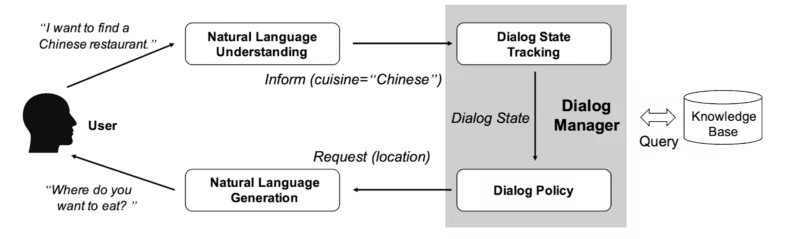

The NLU, NLP and Dialog Manager can be either rules-based (grammars), statistical, use deep learning, or a hybrid combination of all of the above.   

A very basic example of a model based on NLTK using rudimentory NLU, NLG and DM can be found hereunder. Try to have a decent conversation on global warming with this Chatbot (the relevant sentence-pairs for the conversation on global warming comes from the wikipedia page: https://en.wikipedia.org/wiki/Global_warming which you can use to get inspiration for your dialogue).

In [ ]:
import bs4 as bs  
import urllib.request  
import re
 
import nltk
import numpy as np
import random
import string 

import nltk
nltk.download('punkt')
nltk.download('wordnet') 
nltk.download('omw-1.4')
 
import warnings
warnings.filterwarnings('ignore')

raw_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Climate_change')  
raw_data = raw_data.read()
 
html_data = bs.BeautifulSoup(raw_data,'lxml')
 
all_paragraphs =html_data.find_all('p')
 
article_content = ""
 
for p in all_paragraphs:  
    article_content += p.text
    
article_content =  article_content.lower()# converts to lowercase
 
article_content  = re.sub(r'\[[0-9]*\]', ' ', article_content )  
article_content = re.sub(r'\s+', ' ', article_content )  
 
sentence_list = nltk.sent_tokenize(article_content)  
article_words= nltk.word_tokenize(article_content )
  
lemmatizer = nltk.stem.WordNetLemmatizer()
 
def LemmatizeWords(words):
    return [lemmatizer.lemmatize(word) for word in words]
 
remove_punctuation= dict((ord(punctuation), None) for punctuation in string.punctuation)
 
def RemovePunctuations(text):
    return LemmatizeWords(nltk.word_tokenize(text.lower().translate(remove_punctuation)))
 
greeting_input_texts = ("hey", "heys", "hello", "morning", "evening","greetings",)
greeting_replie_texts = ["hey", "hey hows you?", "*nods*", "hello there", "ello", "Welcome, how are you"]
 
def reply_greeting(text):
 
    for word in text.split():
        if word.lower() in greeting_input_texts:
            return random.choice(greeting_replie_texts)
 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
 
 
def give_reply(user_input):
    chatbot_response=''
    sentence_list.append(user_input)
    word_vectors = TfidfVectorizer(tokenizer=RemovePunctuations, stop_words='english')
    vecrorized_words = word_vectors.fit_transform(sentence_list)
    similarity_values = cosine_similarity(vecrorized_words[-1], vecrorized_words)
    similar_sentence_number =similarity_values.argsort()[0][-2]
    similar_vectors = similarity_values.flatten()
    similar_vectors.sort()
    matched_vector = similar_vectors[-2]
    if(matched_vector ==0):
        chatbot_response=chatbot_response+"I am sorry! I don't understand you"
        return chatbot_response
    else:
        chatbot_response = chatbot_response +sentence_list[similar_sentence_number]
        return chatbot_response
 
continue_discussion=True
print("Hello, I am a chatbot, I will answer your queries regarding global warming:")
while(continue_discussion==True):
    user_input = input()
    user_input = user_input .lower()
    if(user_input !='bye'):
        if(user_input =='thanks' or user_input =='thank you very much'  or user_input =='thank you'):
            continue_discussion=False
            print("Chatbot: Most welcome")
        else:
            if(reply_greeting(user_input)!=None):
                print("Chatbot: "+reply_greeting(user_input))
            else:
                print("Chatbot: ",end="")
                print(give_reply(user_input))
                sentence_list.remove(user_input)
    else:
        continue_discussion=False
        print("Chatbot: Take care, bye ..")
 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Hello, I am a chatbot, I will answer your queries regarding global warming:
how global warming affects the world?
Chatbot: land use changes not only affect greenhouse gas emissions.
what do you know about greenhouse>
Chatbot: climate change can be mitigated by reducing greenhouse gas emissions and by enhancing sinks that absorb greenhouse gases from the atmosphere.
Is carbon harful for the environment?
Chatbot: carbon can be priced with carbon taxes and emissions trading systems.
how we can reduce emmisions?
Chatbot: strategies to reduce energy demand vary by sector.
what is the expected future warming?
Chatbot: even if efforts to minimise future warming are successful, some effects will continue for centuries.
bye
Chatbot: Take care, bye ..


The above model uses tokenization, lemmatization, basic greeting, information retrieval, sentence picking and a wikipedia-based knowledge base. All pretty basic. 

## Exercise 2:

For the tutorial, you will now create a better chatbot. For this, we will take different approaches:

Create a chatbot using separate NLU, NLG and DM modules (you can use any library you wish, as long as they are separate and they communicate with each other). You can use either a extractive or generative approach. 



EXPLAIN YOUR APPROACH HERE

Rasa is a tool to build custom AI chatbots using Python and natural language understanding (NLU).
First of all,the NLU in the code are the sample phrases which the chatbot will learn from for each intent in order to understand the user and predict the intent of user's phrases.
The second part are the actions that the system will follow after the intent is found.
In the end, Policies and agent is the DM part.


In [ ]:
## YOUR CODE HERE
!pip install nest_asyncio==1.3.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install rasa_nlu[spacy]  #restart runtime after installation and rerun previous cells.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 147 kB 15.1 MB/s 
     |████████████████████████████████| 829 kB 43.0 MB/s 
     |████████████████████████████████| 47 kB 2.3 MB/s 
     |████████████████████████████████| 318 kB 69.1 MB/s 
     |████████████████████████████████| 78 kB 978 kB/s 
     |████████████████████████████████| 132 kB 59.2 MB/s 
     |████████████████████████████████| 11.7 MB 12.6 MB/s 
     |████████████████████████████████| 36.7 MB 80.8 MB/s 
     |████████████████████████████████| 139 kB 49.0 MB/s 
     |████████████████████████████████| 5.9 MB 21.0 MB/s 
     |████████████████████████████████| 24.9 MB 1.2 MB/s 
     |████████████████████████████████| 79 kB 10.4 MB/s 
     |████████████████████████████████| 10.2 MB 60.8 MB/s 
     |████████████████████████████████| 140 kB 84.7 MB/s 
     |████████████████████████████████| 86 kB 7.3 MB/s 
     |█████████████████████████████

In [ ]:
!pip install rasa_core


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 212 kB 31.3 MB/s 
     |████████████████████████████████| 326 kB 66.7 MB/s 
     |████████████████████████████████| 64 kB 4.4 MB/s 
     |████████████████████████████████| 490 kB 70.6 MB/s 
     |████████████████████████████████| 59 kB 8.5 MB/s 
     |████████████████████████████████| 40 kB 6.6 MB/s 
     |████████████████████████████████| 108 kB 78.7 MB/s 
     |████████████████████████████████| 510 kB 71.7 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 113 kB 75.3 MB/s 
     |████████████████████████████████| 526 kB 66.3 MB/s 
     |████████████████████████████████| 212 kB 85.6 MB/s 
     |████████████████████████████████| 212 kB 60.2 MB/s 
     |████████████████████████████████| 212 kB 60.9 MB/s 
     |████████████████████████████████| 212 kB 64.5 MB/s 
     |████████████████████████████████|

In [ ]:
pip install -U ipython #restart runtime after installation and rerun previous cells.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 761 kB 27.5 MB/s 
     |████████████████████████████████| 386 kB 72.8 MB/s 
     |████████████████████████████████| 1.6 MB 61.0 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 2.0.10
    Uninstalling prompt-toolkit-2.0.10:
      Successfully uninstalled prompt-toolkit-2.0.10
  Attempting uninstall: ipython
    Found existing installation: ipython 7.9.0
    Uninstalling ipython-7.9.0:
      Successfully uninstalled ipython-7.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=7.9.0, but you have ipython 8.7.0 which is incompatible.
google-colab 1.0.0 requires tornado~=6.0.4, but you have tornado 6.1 which is incompatible.
datascience 0.17.5 requ

In [ ]:
import rasa_core
import rasa_nlu
import spacy
     

In [ ]:
import sys
python = sys.executable
     

In [ ]:
!python -m spacy download en_core_web_md


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120.8 MB 518 kB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.0.0-py3-none-any.whl size=122523221 sha256=58f55fa8e16b16ef2ad1c8f84f50cede602e5c1d3367fbe1781a5afb177894f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-4l568zg0/wheels/f2/1d/62/9eb147a5e9a1de1a8275822d6253f6f90fe33a48f3718e772b
Successfully built en-core-web-md

    Linking successful
    /usr/local/lib/python3.8/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.8/dist-packages/spacy/data/en_core_web_md

    You can now load the model via spacy.load('en_core_web_md')



In [ ]:
# Writing various intents with examples to nlu.md file

nlu_md = """
## intent:greet
- hey
- hello there
- hi
- hello there
- good morning
- good evening
- how far
- hey there
- whats up
- hey dude
- goodmorning
- goodevening
- good afternoon

## intent:goodbye
- good by
- later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later

## intent:thanks
- thanks
- thank you
- appreciated
- gracias


## intent:directions
- how do i get to
- i need to get to
- is there a bus to
- how i go take reach
- I need directions to
- how do i get a cab
- where can i get a taxi
- where can i get a bus
-i need to get somewhere
-I am going somewhere

## intent:choosing_item
- 1
- 2
- 3
- 4
- 5
- 6
- 7

## intent:accomodation_enquiry
- Where is the nearest hotel ?
- is there a hotel near by ?
- shey hotel they this area ?
- Where i fit crash for here ?
- i want to get to a hotel
- i need to get to a hotel
- where can i spend the night ?

## intent: restaurant_enquiry
- i need to get food
- i am hungry
- where is the restaurant ?
- is there a restaurant ?
- where can i get water ?
- where i fit buy food for here ?
- is there a food court nearby ?
- where them they sell food ?
- I want chop
- where is the nearest shop?
- where can i eat ?
- i need to eat 
- are there eatries around ?
- where can i buy snacks ?
- I want to buy food


## intent:toilet_enquiry
- i neeed to pee
- where is the rest room?
- where is the toilet
- is there a nearby toilet?
- i they find toilet
- where is the bathroom
- i need to use the bathroom
- where can i pee
- i want peace
- i am pressed


 

"""


%store nlu_md >nlu.md
     

Writing 'nlu_md' (str) to file 'nlu.md'.


In [ ]:
# Adding the NLU components to the pipeline in config.yml file
config = """
language: "en_core_web_md"

pipeline:
- name: "nlp_spacy"                   # loads the spacy language model
- name: "tokenizer_spacy"             # splits the sentence into tokens
- name: "ner_crf"                     # uses the pretrained spacy NER model
- name: "intent_featurizer_spacy"     # transform the sentence into a vector representation
- name: "intent_classifier_sklearn"   # uses the vector representation to classify using SVM
- name: "ner_synonyms"                # trains the synonyms

policies:
- name: "RulePolicy"
  # Confidence threshold for the `core_fallback_action_name` to apply.
  # The action will apply if no other action was predicted with
  # a confidence >= core_fallback_threshold
  core_fallback_threshold: 0.68
  core_fallback_action_name: "action_default_fallback"
  enable_fallback_prediction: True


""" 

%store config >config.yml

Writing 'config' (str) to file 'config.yml'.


In [ ]:
# Import modules for training
!pip install rasa
from rasa.shared.nlu.training_data.loading import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

# loading the nlu training samples
training_data = load_data("nlu.md")
trainer = Trainer(config.load("config.yml"))

# training the nlu
interpreter = trainer.train(training_data)
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 819 kB 19.7 MB/s 
     |████████████████████████████████| 1.4 MB 49.4 MB/s 
     |████████████████████████████████| 156 kB 60.2 MB/s 
     |████████████████████████████████| 480 kB 54.7 MB/s 
     |████████████████████████████████| 380 kB 66.1 MB/s 
  Using cached questionary-1.10.0-py3-none-any.whl (31 kB)
     |████████████████████████████████| 4.9 MB 43.3 MB/s 
     |████████████████████████████████| 1.1 MB 43.1 MB/s 
     |████████████████████████████████| 6.6 MB 36.4 MB/s 
     |████████████████████████████████| 3.0 MB 52.5 MB/s 
     |████████████████████████████████| 31.2 MB 1.3 MB/s 
     |████████████████████████████████| 41 kB 94 kB/s 
     |████████████████████████████████| 123 kB 75.9 MB/s 
     |████████████████████████████████| 162 kB 70.9 MB/s 
     |████████████████████████████████| 772 kB 38.7 MB/s 
  Using cached webexteamssdk-1.6.

ImportError: ignored

In [ ]:
 # Testing the NLU model with an input message

import json
def pprint(o):   
    print(json.dumps(o, indent=2))

pprint(interpreter.parse("x"))
     

In [ ]:
# Writing stories and saving it in the stories.md file

stories_md = """
##  Greeting path             
* greet              
  - utter_greet

## directions path
* directions
  - utter_menu
* choosing_destination
  - utter_destination_received

## Enquires path
* accomodation_enquiry
  - utter_enquiry

## thanks path
* thanks
  - utter_thanks  

## restaurant path
* restaurant_enquiry
  - utter_restaurant_enquiry


## toilet path
* toilet_enquiry
  - utter_toilet_location


## say goodbye
* goodbye
  - utter_goodbye

## thanks
* thanks
  - utter_thanks

## fallback rule
* bot_fallback
  - action_default_fallback

"""

%store stories_md >stories.md

In [ ]:
# Writing all the intents,slots,entities,actions and templates to domain.yml

domain_yml = """
intents:
- greet
- goodbye
- directions
- choosing_item
- accomodation_enquiry
- restaurant_enquiry
- toilet_enquiry
- thanks



slots:
  group:
    type: text

entities:
- group


actions:
- utter_greet
- utter_menu
- utter_destination_received
- utter_enquiry
- utter_toilet_location
- utter_restaurant_enquiry
- utter_goodbye
- utter_thanks
- utter_default


templates:
  utter_greet:
  - text: "\n\n NRC BOT: \n\n Hey! Welcome to NRC Kubwa terminal . How may I help you ? \n\n \n\n You:"

  utter_menu:
  - text: "\n\n NRC BOT: \n\n There is a bus terminal outside the station, it's just accross the road.  You can board a bus to the following destinations: \n\n 1. Wuse  2. Airport 3. Nyanya  4. Zuba  5. Asokoro  6. Maitama  7. Area one  8. Central area  8. Secretariat. \n\n Enter  the appropraite number to know when the next bus leaves the terminal. \n\n \n\n  You:"

  utter_destination_received:
  - text: "\n\n NRC BOT: \n\n The next bus leaves in 15 minutes, do have a safe trip. \n\n \n\n You:"

  utter_goodbye:
  - text: "\n\n NRC BOT: \n\n Thank you for choosing to transit with us. Waiting for your next visit. \n\n \n\n You:"

  utter_enquiry:
  - text: "\n\n NRC BOT: \n\n Take a right turn from the exit, there are several hotels at your service. \n\n \n\n You:"

  utter_toilet_location:
  - text: "\n\n NRC BOT: \n\n There is a toilet symbol on the extreme right from where you stand. \n\n \n\n You:"

  utter_restaurant_enquiry:
  - text: "\n\n NRC BOT: \n\n There is a food court filled with a variety of rastaurants at the extreme left after the entrance. \n\n \n\n You: "

  utter_thanks:
  - text: "\n\n NRC BOT: \n\n my pleasure \n\n \n\n You:"

  utter_default:
  - text: "\n\n NRC BOT: \n\n I'm sorry, I didn't quite understand that. Could you rephrase? \n\n You:"

 
 
"""

%store domain_yml >domain.yml

In [ ]:
# Import the policies and agent
from rasa_core.policies import FallbackPolicy, MemoizationPolicy,KerasPolicy
from rasa_core.agent import Agent

# Initialize the model with `domain.yml`
agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy(), ])

# loading our  training dialogues from `stories.md` 
training_data = agent.load_data('stories.md')


# Training the model
agent.train(
    training_data)
    #validation_split=0.0,
    #epochs=200)

agent.persist('models/dialogue')
     

In [ ]:
!pip uninstall h5py
!pip install h5py==2.10.0
     

In [ ]:
#Starting the Bot
from rasa_core.agent import Agent
agent = Agent.load('models/dialogue', interpreter=model_directory)

In [ ]:
print("Your bot is ready to talk! Type your messages here or send 'stop'" + "\n\n" + "You:")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_message(a)
    for response in responses:
        print(response["text"])

## Exercise 3: 

Create a chatbot using fully integrated NLU, NLG and DM modules, using Transformers and a generative approach.  

EXPLAIN YOUR APPROACH HERE
First of all we need a generative and not a retrieval based approach. Chatbots that use generative methods can generate new dialogue based on large amounts of conversational training data.We will use sequence to sequence encoder-decoder like we used in machine translation.Sometimes these chatbots sound repetitive and cannot promote stable human conversation.
(To address that issue, reinforcement learning can teach chatbots how to optimize dialogues for some cumulative reward.)
I tried to implement a seq2seq model using keras with LSTM encoder and LSTM decoder.

In my second implementation i use the state of the art DialoGPT model which is a pretrained model and have an output for this.

In [ ]:
## YOUR CODE HERE
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_out_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>', U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)
            if verbose:
                print('Ws+Uh>', Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]
import re

lines = open('C:\Users\30698\Downloads\movie_lines.txt.zip/movie_lines.txt', encoding='utf-8',
             errors='ignore').read().split('\n')

convers = open('C:\Users\30698\Downloads\movie_lines.txt.zip/movie_conversations.txt', encoding='utf-8',
             errors='ignore').read().split('\n')
exchn = []
for conver in convers:
    exchn.append(conver.split(' +++$+++ ')[-1][1:-1].replace("'", " ").replace(",","").split())

diag = {}
for line in lines:
    diag[line.split(' +++$+++ ')[0]] = line.split(' +++$+++ ')[-1]



## delete
del(lines, convers, conver, line)



questions = []
answers = []

for conver in exchn:
    for i in range(len(conver) - 1):
        questions.append(diag[conver[i]])
        answers.append(diag[conver[i+1]])
        
        
        

## delete
del(diag, exchn, conver, i)

sorted_ques = []
sorted_ans = []
for i in range(len(questions)):
    if len(questions[i]) < 13:
        sorted_ques.append(questions[i])
        sorted_ans.append(answers[i])

def clean_text(txt):
    txt = txt.lower()
    txt = re.sub(r"i'm", "i am", txt)
    txt = re.sub(r"he's", "he is", txt)
    txt = re.sub(r"she's", "she is", txt)
    txt = re.sub(r"that's", "that is", txt)
    txt = re.sub(r"what's", "what is", txt)
    txt = re.sub(r"where's", "where is", txt)
    txt = re.sub(r"\'ll", " will", txt)
    txt = re.sub(r"\'ve", " have", txt)
    txt = re.sub(r"\'re", " are", txt)
    txt = re.sub(r"\'d", " would", txt)
    txt = re.sub(r"won't", "will not", txt)
    txt = re.sub(r"can't", "can not", txt)
    txt = re.sub(r"[^\w\s]", "", txt)
    return txt

clean_ques = []
clean_ans = []

for line in sorted_ques:
    clean_ques.append(clean_text(line))
        
for line in sorted_ans:
    clean_ans.append(clean_text(line))



## delete
del(answers, questions, line)




for i in range(len(clean_ans)):
    clean_ans[i] = ' '.join(clean_ans[i].split()[:11])


del(sorted_ans, sorted_ques)


## trimming
clean_ans=clean_ans[:30000]
clean_ques=clean_ques[:30000]
## delete


###  count occurences ###
word2count = {}

for line in clean_ques:
    for word in line.split():
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1
for line in clean_ans:
    for word in line.split():
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1

## delete
del(word, line)


###  remove less frequent ###
thresh = 5

vocab = {}
word_num = 0
for word, count in word2count.items():
    if count >= thresh:
        vocab[word] = word_num
        word_num += 1
        
## delete
del(word2count, word, count, thresh)       
del(word_num)        



for i in range(len(clean_ans)):
    clean_ans[i] = '<SOS> ' + clean_ans[i] + ' <EOS>'



tokens = ['<PAD>', '<EOS>', '<OUT>', '<SOS>']
x = len(vocab)
for token in tokens:
    vocab[token] = x
    x += 1
    
    

vocab['cameron'] = vocab['<PAD>']
vocab['<PAD>'] = 0

## delete
del(token, tokens) 
del(x)

### inv answers dict ###
inv_vocab = {w:v for v, w in vocab.items()}



## delete
del(i)



encoder_inp = []
for line in clean_ques:
    lst = []
    for word in line.split():
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])
        
    encoder_inp.append(lst)

decoder_inp = []
for line in clean_ans:
    lst = []
    for word in line.split():
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])        
    decoder_inp.append(lst)

### delete
del(clean_ans, clean_ques, line, lst, word)



from tensorflow.keras.preprocessing.sequence import pad_sequences
encoder_inp = pad_sequences(encoder_inp, 13, padding='post', truncating='post')
decoder_inp = pad_sequences(decoder_inp, 13, padding='post', truncating='post')




decoder_final_output = []
for i in decoder_inp:
    decoder_final_output.append(i[1:]) 

decoder_final_output = pad_sequences(decoder_final_output, 13, padding='post', truncating='post')


del(i)


# decoder_final_output, decoder_final_input, encoder_final, vocab, inv_vocab

VOCAB_SIZE = len(vocab)
MAX_LEN = 13

print(decoder_final_output.shape, decoder_inp.shape, encoder_inp.shape, len(vocab), len(inv_vocab), inv_vocab[0])
from tensorflow.keras.utils import to_categorical
decoder_final_output = to_categorical(decoder_final_output, len(vocab))
embeddings_index = {}
with open('../input/glove6b50d/glove.6B.50d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

print("Glove Loded!")
embedding_dimention = 50
def embedding_matrix_creater(embedding_dimention, word_index):
    embedding_matrix = np.zeros((len(word_index)+1, embedding_dimention))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
          # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
    return embedding_matrix
embedding_matrix = embedding_matrix_creater(50, word_index=vocab)    

del(embeddings_index)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, LSTM, Input, Bidirectional, Concatenate, Dropout, Attention
embed = Embedding(VOCAB_SIZE+1, 
                  50, 
                  
                  input_length=13,
                  trainable=True)

embed.build((None,))
embed.set_weights([embedding_matrix])

enc_inp = Input(shape=(13, ))
#embed = Embedding(VOCAB_SIZE+1, 50, mask_zero=True, input_length=13)(enc_inp)
enc_embed = embed(enc_inp)
enc_lstm = Bidirectional(LSTM(400, return_state=True, dropout=0.05, return_sequences = True))

encoder_outputs, forward_h, forward_c, backward_h, backward_c = enc_lstm(enc_embed)

state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

enc_states = [state_h, state_c]


dec_inp = Input(shape=(13, ))
dec_embed = embed(dec_inp)
dec_lstm = LSTM(400*2, return_state=True, return_sequences=True, dropout=0.05)
output, _, _ = dec_lstm(dec_embed, initial_state=enc_states)

# attention
attn_layer = AttentionLayer()
attn_op, attn_state = attn_layer([encoder_outputs, output])
decoder_concat_input = Concatenate(axis=-1)([output, attn_op])


dec_dense = Dense(VOCAB_SIZE, activation='softmax')
final_output = dec_dense(decoder_concat_input)

model = Model([enc_inp, dec_inp], final_output)

model.summary()
import keras
import tensorflow as tf
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit([encoder_inp, decoder_inp], decoder_final_output, epochs=10, batch_size=24, validation_split=0.15)
model.save('chatbot.h5')
model.save_weights('chatbot_weights.h5')
enc_model = tf.keras.models.Model(enc_inp, [encoder_outputs, enc_states])


decoder_state_input_h = tf.keras.layers.Input(shape=( 400 * 2,))
decoder_state_input_c = tf.keras.layers.Input(shape=( 400 * 2,))

decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]


decoder_outputs, state_h, state_c = dec_lstm(dec_embed , initial_state=decoder_states_inputs)


decoder_states = [state_h, state_c]

#decoder_output = dec_dense(decoder_outputs)

dec_model = tf.keras.models.Model([dec_inp, decoder_states_inputs],
                                      [decoder_outputs] + decoder_states)

from keras.preprocessing.sequence import pad_sequences
print("##########################################")
print("#       start chatting ver. 1.0          #")
print("##########################################")


prepro1 = ""
while prepro1 != 'q':
    
    prepro1 = input("you : ")
    try:
        prepro1 = clean_text(prepro1)
        prepro = [prepro1]
        
        txt = []
        for x in prepro:
            lst = []
            for y in x.split():
                try:
                    lst.append(vocab[y])
                except:
                    lst.append(vocab['<OUT>'])
            txt.append(lst)
        txt = pad_sequences(txt, 13, padding='post')


        ###
        enc_op, stat = enc_model.predict( txt )

        empty_target_seq = np.zeros( ( 1 , 1) )
        empty_target_seq[0, 0] = vocab['<SOS>']
        stop_condition = False
        decoded_translation = ''


        while not stop_condition :

            dec_outputs , h , c = dec_model.predict([ empty_target_seq ] + stat )

            ###
            ###########################
            attn_op, attn_state = attn_layer([enc_op, dec_outputs])
            decoder_concat_input = Concatenate(axis=-1)([dec_outputs, attn_op])
            decoder_concat_input = dec_dense(decoder_concat_input)
            ###########################

            sampled_word_index = np.argmax( decoder_concat_input[0, -1, :] )

            sampled_word = inv_vocab[sampled_word_index] + ' '

            if sampled_word != '<EOS> ':
                decoded_translation += sampled_word           


            if sampled_word == '<EOS> ' or len(decoded_translation.split()) > 13:
                stop_condition = True

            empty_target_seq = np.zeros( ( 1 , 1 ) )  
            empty_target_seq[ 0 , 0 ] = sampled_word_index
            stat = [ h , c ] 

        print("chatbot attention : ", decoded_translation )
        print("==============================================")

    except:
        print("sorry didn't got you , please type again :( ")


In [ ]:
####SECOND implementation

In [ ]:
!pip install transformers
!pip install torch
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 34.3 MB/s 
     |████████████████████████████████| 182 kB 68.9 MB/s 
     |████████████████████████████████| 7.6 MB 63.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 11.5 MB/s 
     |████████████████████████████████| 182 kB 71.7 MB/s 
     |████████████████████████████████| 164 kB 69.1 MB/s 
     |████████████████████████████████| 4.7 MB 40.5 MB/s 
     |████████████████████████████████| 237 kB 77.7 MB/s 
     |████████████████████████████████| 78 kB 9.3 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 51 kB 8.4 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# model_name = "microsoft/DialoGPT-large"
model_name = "microsoft/DialoGPT-medium"
# model_name = "microsoft/DialoGPT-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/642 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/863M [00:00<?, ?B/s]

In [ ]:
for step in range(5):
    # take user input
    text = input(">> You:")
    # encode the input and add end of string token
    input_ids = tokenizer.encode(text + tokenizer.eos_token, return_tensors="pt")
    # concatenate new user input with chat history (if there is)
    bot_input_ids = torch.cat([chat_history_ids, input_ids], dim=-1) if step > 0 else input_ids
    # generate a bot response
    chat_history_ids = model.generate(
        bot_input_ids,
        max_length=1000,
        do_sample=True,
        top_k=100,
        temperature=0.75,
        pad_token_id=tokenizer.eos_token_id
    )
    #print the output
    output = tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)
    print(f"DialoGPT: {output}")

>> You:hello


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


DialoGPT: Hello!!!
>> You:how are you?


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


DialoGPT: I'm doing very well. Thank you.
>> You:what do you think about money?


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


DialoGPT: It's alright.
>> You:could you suggest me a movie?


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


DialoGPT: I'm not the one who could recommend any movie.
>> You:ok thank you


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


DialoGPT: Good book


## Exercise 4:

1) Validate the quality of your chat bots from Exercise 2 and 3 on a relevant subset of the SQuaD 2.0 dataset. What do you observe? 

2) How could you use reinforcement learning to increase the quality of your models?

3) Can you add reinforcement learning to your model from exercise 3? (2 bonus points)


YOUR ANSWERS HERE

In [ ]:
## Code for 1
#k fold cross Validation is used to validate a chatbot
#Squad2 is a question answering dataset which uses Wikipedia.

2)Reinforcement learning leads to more natural chatbots as they learn from human feedback and develop their own control system.

In [ ]:
## COde for 3 